In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../banking.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [6]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### 

### Logistic Regression  

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

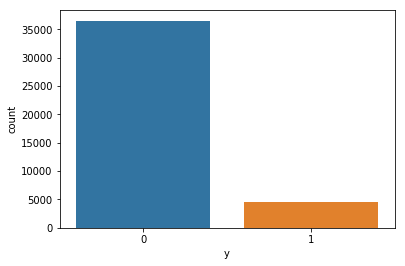

In [8]:
sns.countplot(x="y", data=df)

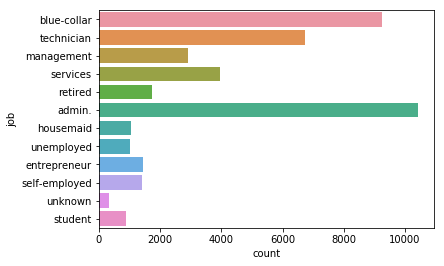

In [10]:
sns.countplot(y="job", data=df)

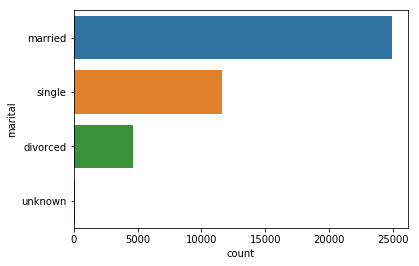

In [12]:
sns.countplot(y="marital", data=df)

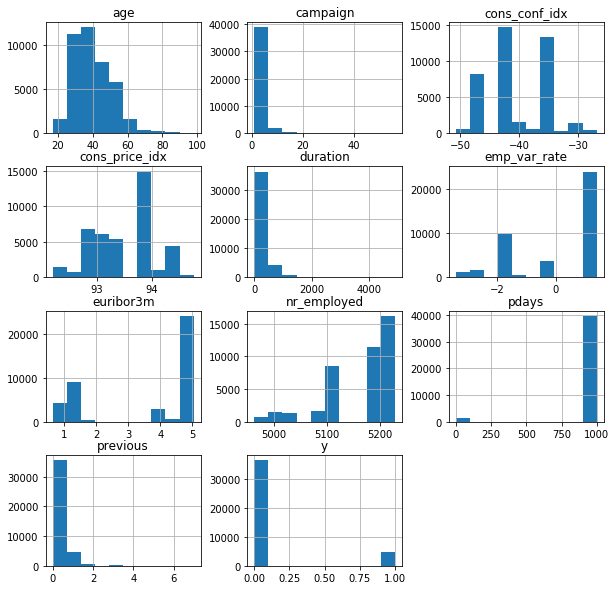

In [77]:
df.hist(figsize=(10,10))
plt.show()

In [16]:
df = df.dropna()

In [17]:
df.shape

(41188, 21)

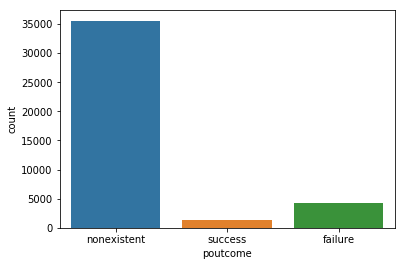

In [18]:
sns.countplot(x="poutcome", data=df)

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [21]:
df_new = df.loc[:, ["job", "marital", "default", "housing", "loan", "poutcome", "y"]]

In [22]:
df_new.head()

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [23]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [25]:
df_new_1 = pd.get_dummies(df_new, columns=df_new.columns[:-1])

In [26]:
df_new_1.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [28]:
X = df_new_1.loc[:, df_new_1.columns != "y"]
y = df_new_1.loc[:, df_new_1.columns == "y"]

In [27]:
from sklearn.cross_validation import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
df_new_1.shape

(41188, 29)

In [32]:
X_train.shape, X_test.shape

((30891, 28), (10297, 28))

In [33]:
y_train.shape, y_test.shape

((30891, 1), (10297, 1))

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
lr.score(X_test, y_test)

0.8983198989997087

In [39]:
y_pred = lr.predict(X_test)

In [41]:
y_pred_prob = lr.predict_proba(X_test)

In [46]:
list(zip(y_pred[50:55], y_pred_prob[50:55]))

[(0, array([0.9085998, 0.0914002])),
 (0, array([0.96518129, 0.03481871])),
 (0, array([0.91394546, 0.08605454])),
 (0, array([0.90368799, 0.09631201])),
 (0, array([0.87515112, 0.12484888]))]

In [48]:
y_pred.shape, y_test.shape

((10297,), (10297, 1))

In [51]:
(y_pred.reshape(y_pred.shape[0], 1) == y_test).mean()

y    0.89832
dtype: float64

In [53]:
y_pred.reshape(y_pred.shape[0], 1).shape

(10297, 1)

In [54]:
y_pred.shape[0]

10297

In [55]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, y_pred.reshape(10297,1)))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9140
          1       0.67      0.19      0.29      1157

avg / total       0.88      0.90      0.87     10297



In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test, y_pred)

array([[9035,  105],
       [ 942,  215]], dtype=int64)

In [62]:
from sklearn.metrics import roc_auc_score

In [64]:
from sklearn.metrics import roc_curve

In [68]:
tpr, fpr, thershold = roc_curve(y_test, y_pred)

In [71]:
roc_auc_score(y_test, y_pred)

0.5871687227777262

In [72]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, y_pred) # 0.89832

0.8983198989997087